### 1.0 | Assignment 3: Evaluating Linear Regression Models

### Overview:

The management team of a real state company is interested in understanding if machine learning techniques can accurately predict residential housing market values to supplement more conventional methods. Using a sample of labeled real estate data for the city of Boston as training data, models will be assessed based on the minimzed RMSE acheived.

As with any machine learning model build, the data must be first analyzed, scaled, encoded and imputed, if necassary. An initial analysis of the data showed that the number of rooms in a given house and the % of local poplation in a lower economic class had the strongest correlation to the response variable, median house value. Next, the data was scaled across all continuous variables and cateogrical variables were encoded. No values needed to be imputed.

The data was split into a training and test data set and then was fed into a Lasso Regression, Ridge Regression and Elastic Regression. One technique applied to the response variable was to apply a log function to it. This was shown to improve performance by reducing the RMSE and improving the r^2 score. The value in using a log value over the actual value in the dependent variable is to normalize the skewed distribution of the response variable and achieve homoscedasticity across residuals at all values. The three models were assesed for performance using a cross-validation design applying a number of different alpha values. It was found that each regression model generated nearly identical RMSE and r^2 scores of .198 (of log value) and .75, respectively. 

The recommendation to the managmen team is that they consider additional model types beyond linear models. While the results produced by any of the three linear models provide some predictive power, it would be expected that considering additional modeling options would likely result in an improved outcome and minimized RMSE.


### 1.1 | Load Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler #scale any continuous fields
from sklearn.preprocessing import Imputer #impute any missing values
from sklearn.preprocessing import LabelBinarizer
#################################################
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn import metrics #to evaluate model performances

import warnings
warnings.filterwarnings("ignore")

### 1.2 | Import Data

In [2]:
file = "C:/Users/David/OneDrive/MSDS/MSDS422/Week3/boston.csv"
df = pd.read_csv(file,sep = ',')
print('df rows:',len(df))
df.head()

df rows: 506


,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,Nahant,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,Swampscott,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,Swanpscott,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,Marblehead,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,Marblehead,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### 1.3 | Data Pre-Processing

In [3]:
#convert dependent variable to log value
#df['mv'] = np.log(df['mv'])

#isolate cat/cont/response fields
cat_fields = ['chas']
cont_fields = ['crim','zn','nox','rooms','dis','rad','tax','ptratio','lstat']
response_fields = ['mv']

df[cat_fields+cont_fields+response_fields].head()

,chas,crim,zn,nox,rooms,dis,rad,tax,ptratio,lstat,mv
0,0,0.00632,18.0,0.538,6.575,4.0900,1,296,15.3,4.98,24.0
1,0,0.02731,0.0,0.469,6.421,4.9671,2,242,17.8,9.14,21.6
2,0,0.02729,0.0,0.469,7.185,4.9671,2,242,17.8,4.03,34.7
3,0,0.03237,0.0,0.458,6.998,6.0622,3,222,18.7,2.94,33.4
4,0,0.06905,0.0,0.458,7.147,6.0622,3,222,18.7,5.33,36.2


In [4]:
#describe cat fields
df[cat_fields].describe()

,chas
count,506.000000
mean,0.069170
std,0.253994
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
#describe cont fields
df[cont_fields+response_fields].describe()

,crim,zn,nox,rooms,dis,rad,tax,ptratio,lstat,mv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,0.554695,6.284634,3.795043,9.549407,408.237154,18.455534,12.653063,22.528854
std,8.601545,23.322453,0.115878,0.702617,2.105710,8.707259,168.537116,2.164946,7.141062,9.182176
min,0.006320,0.000000,0.385000,3.561000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,0.449000,5.885500,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,0.538000,6.208500,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,0.624000,6.623500,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,0.871000,8.780000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [6]:
# check for any NA values to determine whether imputing is necassary
for i in cat_fields+cont_fields:
    print('NA count for',i,':',len(df[df[i].isna() == True]))

NA count for chas : 0
NA count for crim : 0
NA count for zn : 0
NA count for nox : 0
NA count for rooms : 0
NA count for dis : 0
NA count for rad : 0
NA count for tax : 0
NA count for ptratio : 0
NA count for lstat : 0


### 1.4 | EDA

In [7]:
#create binary variable for comparing distributions of cont fields across above average and below avearge market values
def mv_split(i):
    i = int(i)
    if i > df['mv'].mean(): cat = 1
    if i <= df['mv'].mean(): cat = 0
    return(cat)

df['mv_cat'] = df['mv'].map(mv_split)
df[['mv_cat','mv']].head()

,mv_cat,mv
0,1,24.0
1,0,21.6
2,1,34.7
3,1,33.4
4,1,36.2


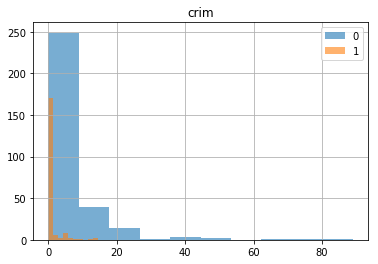

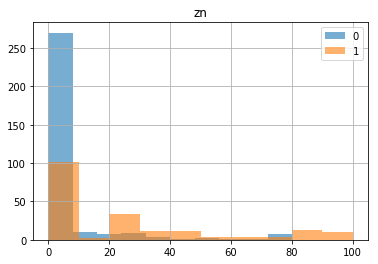

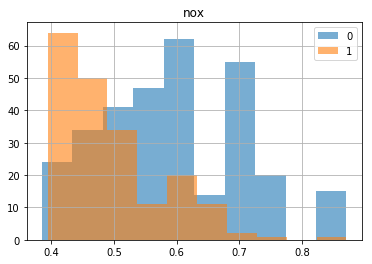

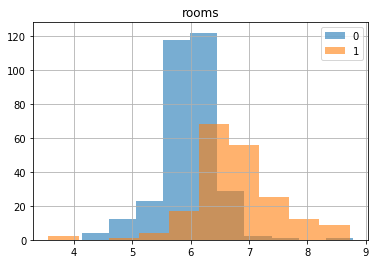

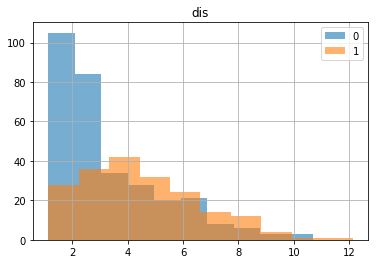

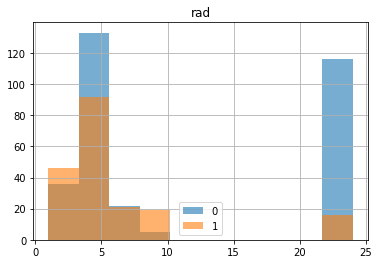

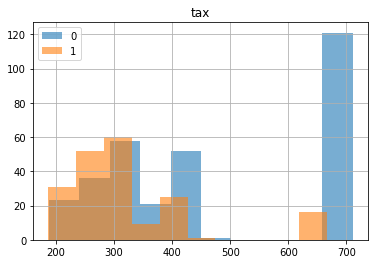

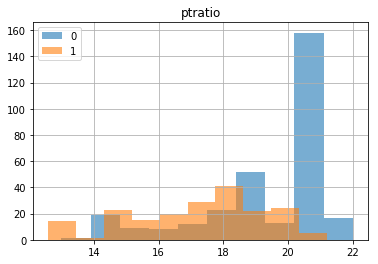

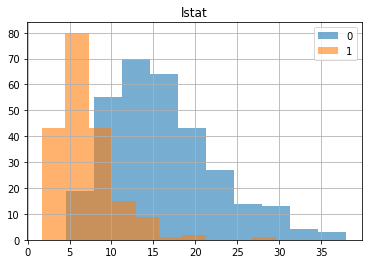

In [8]:
#Distribution of continuous fields separated by mv_cat
for i in cont_fields:
    plt.figure(i)
    df.groupby('mv_cat')[i].hist(alpha = .6)
    plt.title(i)
    plt.legend('01')
#Views gives some insight into which variables follow distinct distributions for above and below average homes

<Figure size 432x288 with 0 Axes>

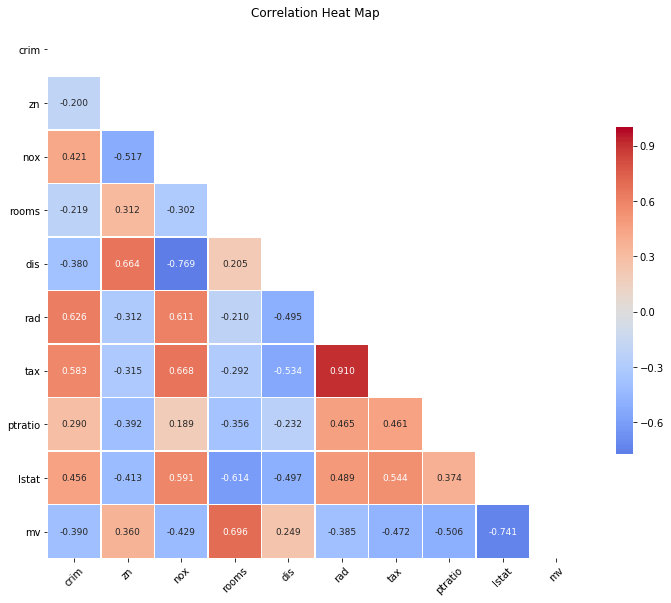

In [9]:
import seaborn as sns

def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   

for i in [cont_fields+response_fields]:
    corr_chart(df_corr = df[i])

#this visual confirms that none of the variables are correlated with one another. In other words, when housing is equal to 1
# loan is not also equal to one

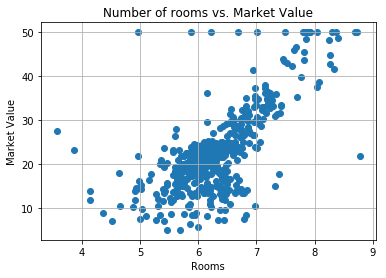

In [10]:
#plot rooms versus market value since this variable shows the strongest positive individual correlation to market value
plt.scatter(df['rooms'],df['mv'])
plt.title('Number of rooms vs. Market Value')
plt.xlabel('Rooms')
plt.ylabel('Market Value')
plt.grid()
#number of rooms shows a strong positive correlation to market value with a consistent slope. There are a few outliers with
#only a medium amount of rooms but a high market value

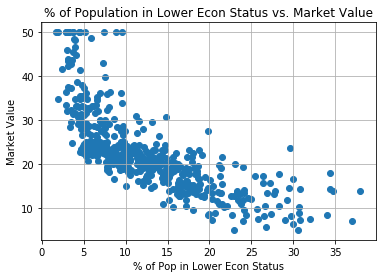

In [11]:
#plot lstat versus market value since this variable shows the strongest negative individual correlation to market value
plt.scatter(df['lstat'],df['mv'])
plt.title('% of Population in Lower Econ Status vs. Market Value')
plt.xlabel('% of Pop in Lower Econ Status')
plt.ylabel('Market Value')
plt.grid()
#it looks like once the lstat drops below 5% it begins to increase the market value at a much greater rate. However,
#there are also fewer values here.

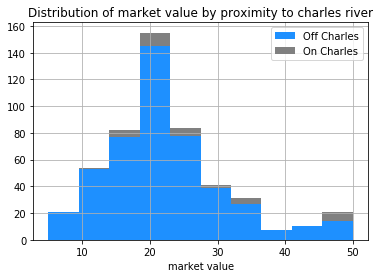

In [12]:
#isolate market value by on the charles river or not
x1 = df['mv'][df['chas']==0]
x2 = df['mv'][df['chas']==1]

#combine threads and plot
plt.hist([x1,x2],stacked = True,color = ["dodgerblue","grey"])
plt.title("Distribution of market value by proximity to charles river")
plt.xlabel("market value")
plt.legend({'Off Charles':'dodgerblue','On Charles':"grey"})
plt.grid(True)
plt.show()

#Based on this view it doesn't appear that this variable will be valuable

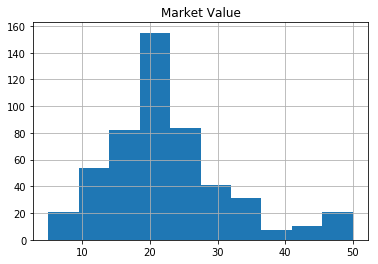

In [13]:
#Distribution of log response field
df['mv'].hist()
plt.title('Market Value')
plt.show()

### 1.5 | Split into Training and Test Data

In [14]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42
TEST_SIZE = .3

#split data into train and test sets
xtrain,xtest,ytrain,ytest=train_test_split(df[cat_fields+cont_fields],df['mv'],
                                               test_size = TEST_SIZE, random_state = RANDOM_STATE)

In [15]:
#confirm split went according to plan. both y values are close to the mean value
print("Row count of Xtrain:",len(xtrain))
print("Row count of Ytrain:",len(ytrain),"/ Avg Market Value: ",np.mean(ytrain))
print("Row count of Xtest:",len(xtest))
print("Row count of Ytest:",len(ytest),"/ Avg Market Value: ",np.mean(ytest))

Row count of Xtrain: 354
Row count of Ytrain: 354 / Avg Market Value:  23.023163841807907
Row count of Xtest: 152
Row count of Ytest: 152 / Avg Market Value:  21.377631578947362


### 1.6 | Scale Test and Training Data 

In [16]:
#scale training data separate from test so as to not influence scaling
train_scaled = pd.DataFrame(StandardScaler().fit_transform(xtrain[cont_fields]),
                   columns = xtrain[cont_fields].columns, index = xtrain.index)

xtrain = pd.concat([xtrain[cat_fields],train_scaled],axis = 1)

#scale test data likewise
test_scaled = pd.DataFrame(StandardScaler().fit_transform(xtest[cont_fields]),
                   columns = xtest[cont_fields].columns, index = xtest.index)

xtest = pd.concat([xtest[cat_fields],test_scaled],axis = 1)

print("Test Data shape:",xtest.shape)
print("Training Data shape: ",xtrain.shape)
xtrain.head()

Test Data shape: (152, 10)
Training Data shape:  (354, 10)


C:\Users\David\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\David\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\David\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\David\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,chas,crim,zn,nox,rooms,dis,rad,tax,ptratio,lstat
5,0,-0.414259,-0.505125,-0.851085,0.145264,1.081628,-0.746179,-1.112790,0.187271,-1.015316
116,0,-0.402008,-0.505125,-0.087967,-0.208401,-0.487876,-0.398464,0.150088,-0.212090,-0.053663
45,0,-0.397211,-0.505125,-0.936828,-0.896237,0.628596,-0.746179,-1.046639,-0.167716,-0.311324
16,0,-0.290936,-0.505125,-0.165136,-0.543965,0.345133,-0.630274,-0.601625,1.207859,-0.822422
468,0,1.457816,-0.505125,0.194987,-0.556496,-0.403892,1.687825,1.557294,0.852872,0.803800


### 1.7 | One Hot Encoding of Categorical Variables

In [17]:
#this method is tricky since I want to one hot encode across a combined test and training set. If I were to encode test
#and training in isolation then I would run the risk of some values showing up only in one of the sets resulting in a mismatched
#number of columns

#define variable for identifying test and train
xtrain['train'] = 1
xtest['train'] = 0

#Combine test and train data
combined = pd.concat([xtrain,xtest],axis = 0)

#isolate categorical variables
cat_df = combined[cat_fields]

#one hot encode
cat_df_encoded = pd.get_dummies(cat_df,drop_first = True)

combined_2 = pd.concat([cat_df_encoded,combined[cont_fields],combined['train']],axis = 1)

#split combined data set back to train and test
xtrain = combined_2[combined_2['train'] == 1]
xtest  = combined_2[combined_2['train'] == 0]
#remove train field defined earlier
xtrain.drop('train',axis = 1,inplace = True)
xtest.drop('train',axis = 1, inplace = True)

print("Test Data shape:",xtest.shape)
print("Training Data shape: ",xtrain.shape)
#Check the columns are equal and and the rows counts remained the same

Test Data shape: (152, 10)
Training Data shape:  (354, 10)


### 1.8 | Model I: ElasticNet Regression

In [18]:
#apply different alpha values for best result
for i in range(1,10):
        model1 = ElasticNetCV(n_alphas = i,l1_ratio = .5,selection = 'random',copy_X=True,normalize = False, cv=5, random_state = RANDOM_STATE)
        # Evaluate performance of optimal model on test data
        model1.fit(xtrain, ytrain)
        # Apply model1 to out-of-sample test data `xtest`.
        model1_pred = model1.predict(xtest)
        print("---------------------------")
        print("n_alphas: ",i," performance")
        print("Root mean squared error : {}".format(np.sqrt(metrics.mean_squared_error(ytest, model1_pred)).round(3)))
        print("R-squared : {}".format(metrics.r2_score(ytest, model1_pred).round(2)))
#looks like a lower n_alpha value produces a lower RMSE

---------------------------
n_alphas:  1  performance
Root mean squared error : 4.879
R-squared : 0.68
---------------------------
n_alphas:  2  performance
Root mean squared error : 4.879
R-squared : 0.68
---------------------------
n_alphas:  3  performance
Root mean squared error : 4.879
R-squared : 0.68
---------------------------
n_alphas:  4  performance
Root mean squared error : 4.879
R-squared : 0.68
---------------------------
n_alphas:  5  performance
Root mean squared error : 4.879
R-squared : 0.68
---------------------------
n_alphas:  6  performance
Root mean squared error : 4.879
R-squared : 0.68
---------------------------
n_alphas:  7  performance
Root mean squared error : 4.879
R-squared : 0.68
---------------------------
n_alphas:  8  performance
Root mean squared error : 4.879
R-squared : 0.68
---------------------------
n_alphas:  9  performance
Root mean squared error : 4.879
R-squared : 0.68


In [19]:
model1 = ElasticNetCV(n_alphas = 2,l1_ratio = .5,copy_X=True,normalize = False, cv=5, random_state = RANDOM_STATE)
# Evaluate performance of optimal model on test data
model1.fit(xtrain, ytrain)
# Apply model1 to out-of-sample test data `xtest`.
model1_pred = model1.predict(xtest)

#examine coefficients
coeff = pd.concat([pd.Series(xtest.columns),pd.Series(model1.coef_)],axis = 1)
coeff.columns = ['Predictor','Coefficient']
coeff

,Predictor,Coefficient
0,chas,3.095033
1,crim,-1.122002
2,zn,0.796766
3,nox,-1.715704
4,rooms,2.769009
5,dis,-2.821669
6,rad,1.606887
7,tax,-1.286848
8,ptratio,-1.882794
9,lstat,-4.158326


### 1.9 | Model II: Lasso Regression

In [20]:
#apply different alpha values for best result
for i in range(1,10):
        model2 = LassoCV(n_alphas = i,selection = 'random',copy_X=True,normalize = False, cv=5, random_state = RANDOM_STATE)
        # Evaluate performance of optimal model on test data
        model2.fit(xtrain, ytrain)
        # Apply model1 to out-of-sample test data `xtest`.
        model2_pred = model2.predict(xtest)
        print("---------------------------")
        print("n_alphas: ",i," performance")
        print("Root mean squared error : {}".format(np.sqrt(metrics.mean_squared_error(ytest, model2_pred)).round(3)))
        print("R-squared : {}".format(metrics.r2_score(ytest, model2_pred).round(2)))
#looks like a lower n_alpha value produces a lower RMSE

---------------------------
n_alphas:  1  performance
Root mean squared error : 4.874
R-squared : 0.68
---------------------------
n_alphas:  2  performance
Root mean squared error : 4.874
R-squared : 0.68
---------------------------
n_alphas:  3  performance
Root mean squared error : 4.874
R-squared : 0.68
---------------------------
n_alphas:  4  performance
Root mean squared error : 4.874
R-squared : 0.68
---------------------------
n_alphas:  5  performance
Root mean squared error : 4.874
R-squared : 0.68
---------------------------
n_alphas:  6  performance
Root mean squared error : 4.874
R-squared : 0.68
---------------------------
n_alphas:  7  performance
Root mean squared error : 4.874
R-squared : 0.68
---------------------------
n_alphas:  8  performance
Root mean squared error : 4.874
R-squared : 0.68
---------------------------
n_alphas:  9  performance
Root mean squared error : 4.874
R-squared : 0.68


In [21]:
model2 = LassoCV(n_alphas = 1,copy_X=True,normalize = False, cv=5, random_state = RANDOM_STATE)
# Evaluate performance of optimal model on test data
model2.fit(xtrain, ytrain)
# Apply model1 to out-of-sample test data `xtest`.
model2_pred = model2.predict(xtest)

#examine coefficients
coeff = pd.concat([pd.Series(xtest.columns),pd.Series(model1.coef_)],axis = 1)
coeff.columns = ['Predictor','Coefficient']
coeff

,Predictor,Coefficient
0,chas,3.095033
1,crim,-1.122002
2,zn,0.796766
3,nox,-1.715704
4,rooms,2.769009
5,dis,-2.821669
6,rad,1.606887
7,tax,-1.286848
8,ptratio,-1.882794
9,lstat,-4.158326


### 2.0 | Model III: Ridge Regression

In [22]:
#apply different alpha values for best result
model3 = RidgeCV(alphas = [1e-3, 1e-2, 1e-1, 1],scoring = 'neg_mean_squared_error',normalize = False, cv=5)
# Evaluate performance of optimal model on test data
model3.fit(xtrain, ytrain)
# Apply model1 to out-of-sample test data `xtest`.
model3_pred = model3.predict(xtest)
print("---------------------------")
print("Root mean squared error : {}".format(np.sqrt(metrics.mean_squared_error(ytest, model3_pred)).round(3)))
print("R-squared : {}".format(metrics.r2_score(ytest, model3_pred).round(2)))
#looks like a lower n_alpha value produces a lower RMSE

---------------------------
Root mean squared error : 4.87
R-squared : 0.68


In [23]:
#examine coefficients
coeff = pd.concat([pd.Series(xtest.columns),pd.Series(model3.coef_)],axis = 1)
coeff.columns = ['Predictor','Coefficient']
coeff

,Predictor,Coefficient
0,chas,3.343385
1,crim,-1.152902
2,zn,0.844271
3,nox,-1.794298
4,rooms,2.741241
5,dis,-2.930619
6,rad,1.772836
7,tax,-1.416807
8,ptratio,-1.899492
9,lstat,-4.172050


## 2.1 | Analysis of Results

Text(0, 0.5, 'Actual Value')

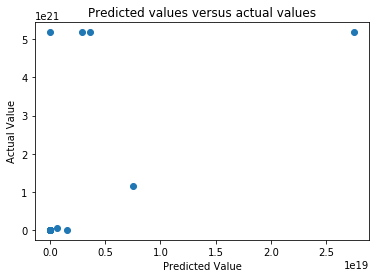

In [24]:
#convert back to regular values from log
plt.scatter(np.exp(model3_pred),np.exp(ytest))
plt.title('Predicted values versus actual values')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')